<a href="https://colab.research.google.com/github/Rukaya-lab/Tensorflow-practice/blob/main/Fmnist_Multiclass_object_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [79]:
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime


In [80]:
#set the seed
from numpy.random import seed
seed(123)

## **Loading the fashion Data set from keras library**

In [81]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [82]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

60000
60000
10000
10000


In [83]:
import pandas as pd

df= pd.DataFrame(train_labels, columns= ['train_label'] )
df.head(25)

,train_label
0,9
1,0
2,0
3,3
4,0
5,2
6,7
7,2
8,5
9,5


In [84]:
#Check shape of the first element training image
train_images[0].shape

(28, 28)

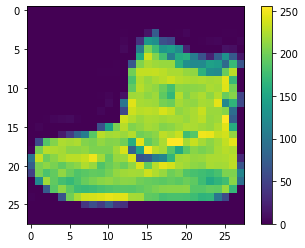

In [85]:
#check the range of pixel values for the first element in the train data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

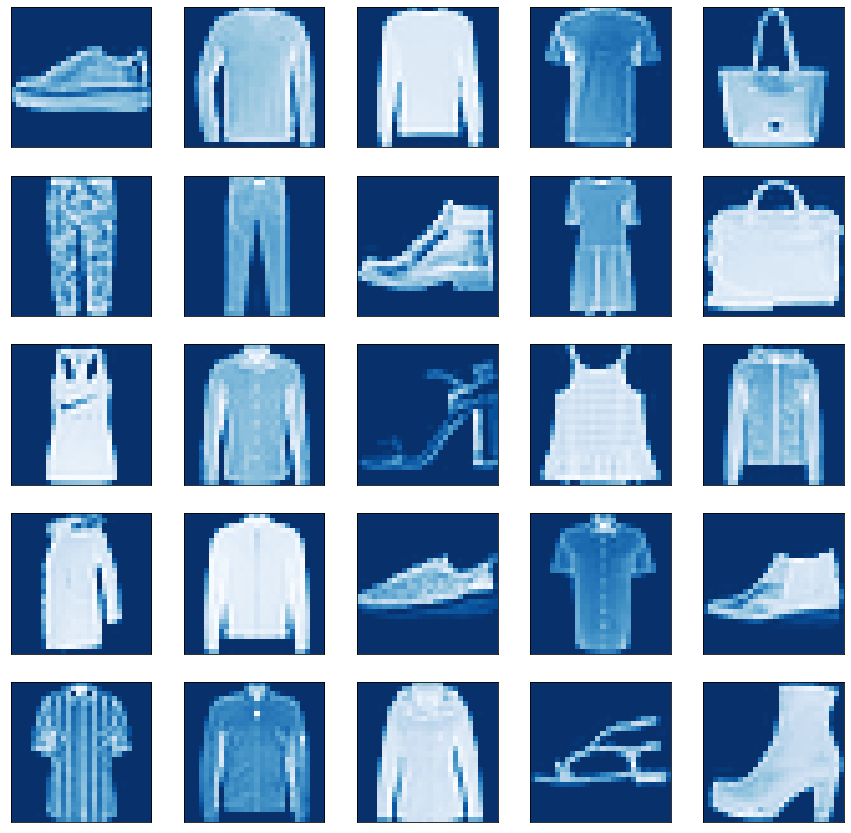

In [116]:

plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,len(train_images))     
  plt.imshow(train_images[rand_no], cmap='Blues_r')

In [87]:
#using the the first images generated and the values from the dataframe

#create an array to access the class name based on label number.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [88]:
label_names= {0:'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
                             5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'  }

labels = [label_names[item] for item in df.train_label]                              

In [98]:
df1= pd.DataFrame(labels, columns= ['label_names'])

In [97]:
df_table= pd.concat([df,df1], axis=1)
df_table

,train_label,label_names
0,9,Ankle boot
1,0,T-shirt/top
2,0,T-shirt/top
3,3,Dress
4,0,T-shirt/top
...,...,...
59995,5,Sandal
59996,1,Trouser
59997,3,Dress
59998,0,T-shirt/top


In [99]:
#Normalizing the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [100]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [102]:
model = Sequential()
  #input layer size is 784 after flattening
model.add(Flatten(input_shape=(28, 28)))
  #hidden layer with 512 neurons
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [103]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [105]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)
#modelcheckpoint_callback = ModelCheckPoint('best_model.hdf5',monitor='val_loss', verbose=0, mode='auto',save_best_only=True)

In [108]:
model.fit(x= train_images, 
          y= train_labels, 
          epochs= 50, 
          validation_split= 0.2, 
          callbacks=[tensorboard_callback,earlystopping_callback])

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2077 - accuracy: 0.9224 - val_loss: 0.3264 - val_accuracy: 0.8879
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2005 - accuracy: 0.9255 - val_loss: 0.3519 - val_accuracy: 0.8824
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1917 - accuracy: 0.9278 - val_loss: 0.3158 - val_accuracy: 0.8919
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1875 - accuracy: 0.9297 - val_loss: 0.3614 - val_accuracy: 0.8867
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1781 - accuracy: 0.9327 - val_loss: 0.3472 - val_accuracy: 0.8850
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1746 - accuracy: 0.9346 - val_loss: 0.3493 - val_accuracy: 0.8870


In [110]:
 model.evaluate(test_images,  test_labels, verbose= 1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8833


[0.3519183397293091, 0.8833000063896179]

In [111]:
predictions = model.predict(test_images)

In [112]:
predictions.shape

(10000, 10)

In [113]:
class_names[np.argmax(predictions[201])]

'T-shirt/top'

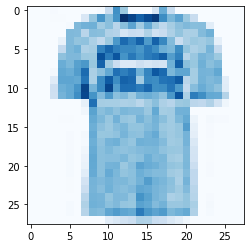

In [117]:
plt.imshow(test_images[201],cmap='Blues')

In [118]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

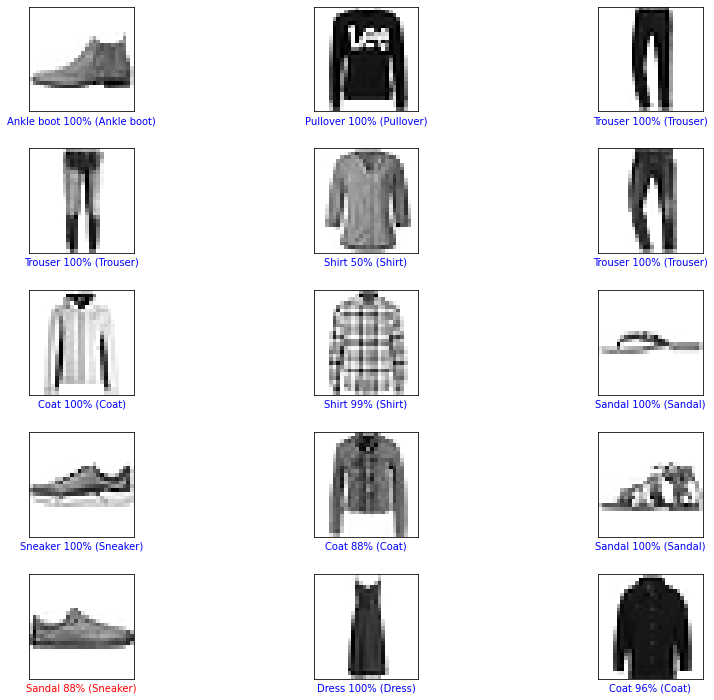

In [119]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()